### Model Training

#### Importing packages

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor    
import warnings

#### Import Dataset

In [37]:
df = pd.read_csv('Data/ProcessedStudentPerformance.csv')

In [38]:
df.head()

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [39]:
# dependent feature: average score
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [40]:
y = df['average score']
X = df.drop(['average score'], axis = 1)

In [41]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [42]:
y.head()

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: average score, dtype: float64

#### Separating numerical and categorical columns

In [43]:
num_cols = X.select_dtypes(exclude = 'O').columns
cat_cols = X.select_dtypes(include = 'O').columns

#### Column Transformer

In [44]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ss = StandardScaler()
ohe = OneHotEncoder()

preprocessor = ColumnTransformer([
    ('OneHotEncoder', ohe, cat_cols),
    ('StandardScalar', ss, num_cols)
])

In [45]:
X = preprocessor.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Evaluate Model

In [47]:
def evaluate(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    r2 = r2_score(true, predicted)
    return mse, mae, r2

In [54]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    mse_train, mae_train, r2_train = evaluate(y_train, y_train_pred)
    mse_test, mae_test, r2_test = evaluate(y_test, y_test_pred)

    print('Training Performance:')
    print(' -> Mean Squared Error: ', round(mse_train, 3))
    print(' -> Mean Absloute Error: ', round(mae_train, 3))
    print(' -> r2_score: ', round(r2_train, 3))
    print('-'*30)

    print('Test Performance:')
    print(' -> Mean Squared Error: ', round(mse_test, 3))
    print(' -> Mean Absloute Error: ', round(mae_test, 3))
    print(' -> r2_score: ', round(r2_test, 3))
    print('-'*30)
    r2_list.append(r2_test)

    print('*'*35)

Linear Regression
Training Performance:
 -> Mean Squared Error:  0.0
 -> Mean Absloute Error:  0.0
 -> r2_score:  1.0
------------------------------
Test Performance:
 -> Mean Squared Error:  0.0
 -> Mean Absloute Error:  0.0
 -> r2_score:  1.0
------------------------------
***********************************
Lasso
Training Performance:
 -> Mean Squared Error:  1.018
 -> Mean Absloute Error:  0.808
 -> r2_score:  0.995
------------------------------
Test Performance:
 -> Mean Squared Error:  1.115
 -> Mean Absloute Error:  0.831
 -> r2_score:  0.995
------------------------------
***********************************
Ridge
Training Performance:
 -> Mean Squared Error:  0.0
 -> Mean Absloute Error:  0.005
 -> r2_score:  1.0
------------------------------
Test Performance:
 -> Mean Squared Error:  0.0
 -> Mean Absloute Error:  0.005
 -> r2_score:  1.0
------------------------------
***********************************
K-Neighbors Regressor
Training Performance:
 -> Mean Squared Error:  3.9

In [55]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Name', 'R2_Score']).sort_values(by = ['R2_Score'], ascending = False)

,Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,1.000000
4,Decision Tree,0.997631
6,XGBRegressor,0.997431
5,Random Forest Regressor,0.996092
7,CatBoosting Regressor,0.994961
1,Lasso,0.994801
8,AdaBoost Regressor,0.992176
3,K-Neighbors Regressor,0.966842


#### Linear Regression

In [57]:
lr = LinearRegression(fit_intercept = True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print('Accuracy Score: ', score)

Accuracy Score:  100.0


#### Plotting True v/s Predicted graph

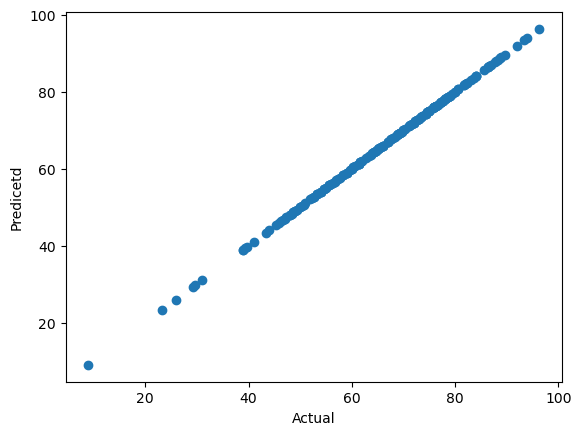

In [58]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicetd')
plt.show()

<Axes: xlabel='average score'>

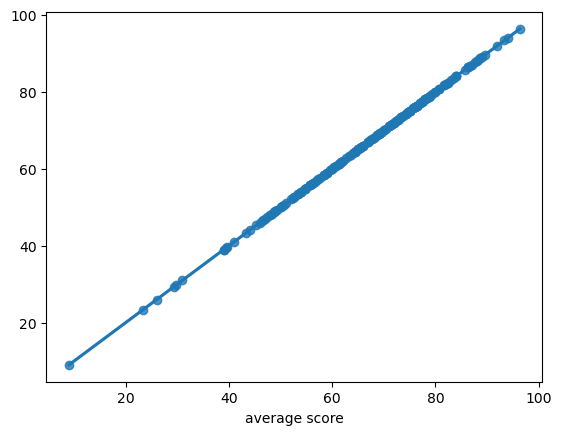

In [60]:
sns.regplot(x = y_test, y = y_pred)

#### Difference Between Actual and predicted values

In [63]:
pred_diff = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': (y_test - y_pred)})
pred_diff

,Actual Value,Predicted Value,Difference
521,87.000000,87.000000,1.421085e-14
737,64.000000,64.000000,7.105427e-15
740,75.000000,75.000000,1.421085e-14
660,74.666667,74.666667,2.842171e-14
411,81.666667,81.666667,2.842171e-14
...,...,...,...
408,55.000000,55.000000,0.000000e+00
332,57.000000,57.000000,0.000000e+00
208,77.000000,77.000000,2.842171e-14
613,72.000000,72.000000,1.421085e-14
